In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [3]:
data_X, class_label = make_classification(n_samples=1000, n_classes=2, weights=[1,1], random_state=1)

In [4]:
trainX, testX, trainy, testy = train_test_split(data_X, class_label, test_size=0.3, random_state=1)

In [11]:
model = RandomForestClassifier()
model.fit(trainX, trainy)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [18]:
probs = model.predict_proba(testX)
probs

array([[0.98, 0.02],
       [0.06, 0.94],
       [0.95, 0.05],
       [0.92, 0.08],
       [0.06, 0.94],
       [0.2 , 0.8 ],
       [0.21, 0.79],
       [0.1 , 0.9 ],
       [0.19, 0.81],
       [0.89, 0.11],
       [0.21, 0.79],
       [0.04, 0.96],
       [0.94, 0.06],
       [0.24, 0.76],
       [0.26, 0.74],
       [0.95, 0.05],
       [0.16, 0.84],
       [0.92, 0.08],
       [0.07, 0.93],
       [0.97, 0.03],
       [0.96, 0.04],
       [0.84, 0.16],
       [0.15, 0.85],
       [0.04, 0.96],
       [0.1 , 0.9 ],
       [0.12, 0.88],
       [0.97, 0.03],
       [0.17, 0.83],
       [0.25, 0.75],
       [0.08, 0.92],
       [0.98, 0.02],
       [0.94, 0.06],
       [0.23, 0.77],
       [0.28, 0.72],
       [0.21, 0.79],
       [0.81, 0.19],
       [0.96, 0.04],
       [0.76, 0.24],
       [0.08, 0.92],
       [0.96, 0.04],
       [0.99, 0.01],
       [0.22, 0.78],
       [0.97, 0.03],
       [0.79, 0.21],
       [0.28, 0.72],
       [0.95, 0.05],
       [0.21, 0.79],
       [0.07,

In [14]:
probs = probs[:, 1]

In [15]:
auc = roc_auc_score(testy, probs)
print('AUC: %.2f' % auc)

AUC: 0.95


In [16]:
fpr, tpr, thresholds = roc_curve(testy, probs)

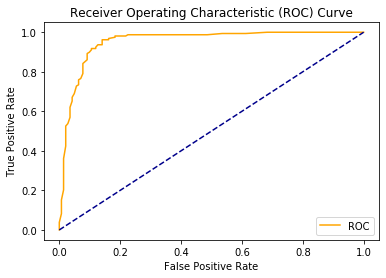

In [17]:
plot_roc_curve(fpr, tpr)